# Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Advertising.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')
df

,SrNo,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,SrNo,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes


SrNo           int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
df.columns


Index(['SrNo', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# Checking null values in the dataframe
df.isnull().sum()

SrNo         0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#no use of first column
df = df.drop("SrNo",axis=1)

In [9]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>,
        <AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

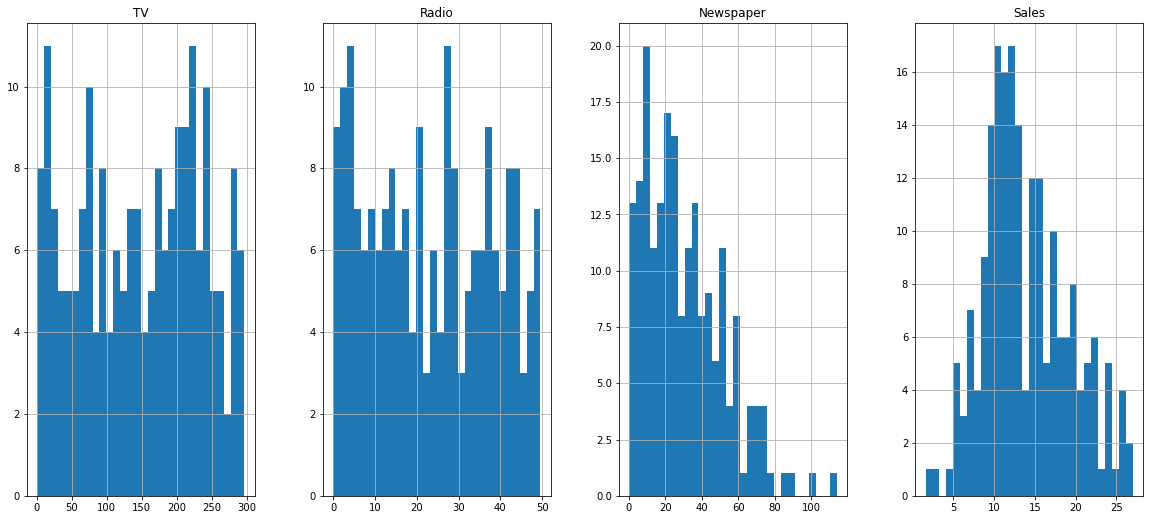

In [10]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

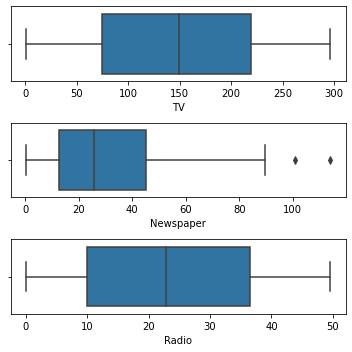

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

Newspaper having outliers

In [12]:
df.skew()


TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [13]:
# Creating correlation matrix
cor = df.corr()
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


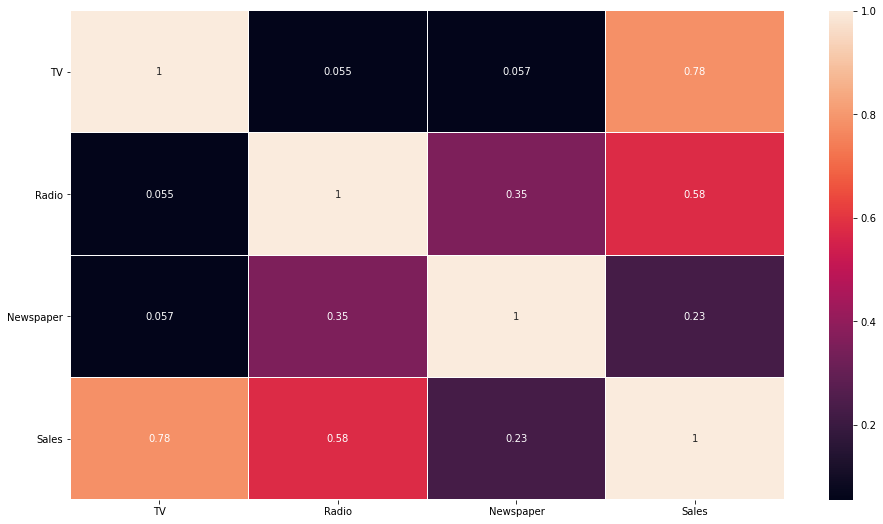

In [14]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

# Removing outliers


In [15]:
df1 = df[['TV','Radio','Newspaper','Sales']]
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
# removing outliers by Zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
df.shape

(200, 4)

In [18]:
df_new.shape

(198, 4)

In [19]:
# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0

1 % loss by Zscore which is less than 5%


removing outliers by IQR method:

In [20]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
print(df_1.shape)
print(df)

(198, 4)
        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [22]:
IQRdataloss=(200-198)/200*100
IQRdataloss

1.0

1 % loss by IQR which is less than 5%, so we can choose any methode Zscore or IQR, Here we will go with Zscore.


# Checking skewness

In [23]:
df_new.skew()


TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales        0.407130
dtype: float64

# Removing skewness using yeo-johnson method:

In [24]:
# Defining skewed columns 
features = ["TV","Radio","Newspaper"]

In [25]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [26]:
df_new[features] = scaler.fit_transform(df_new[features].values)

In [27]:
df_new[features]

,TV,Radio,Newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
195,-1.288311,-1.423941,-0.687435
196,-0.521579,-1.287689,-1.146090
197,0.416577,-0.862474,-1.314437
198,1.467535,1.182269,1.517395


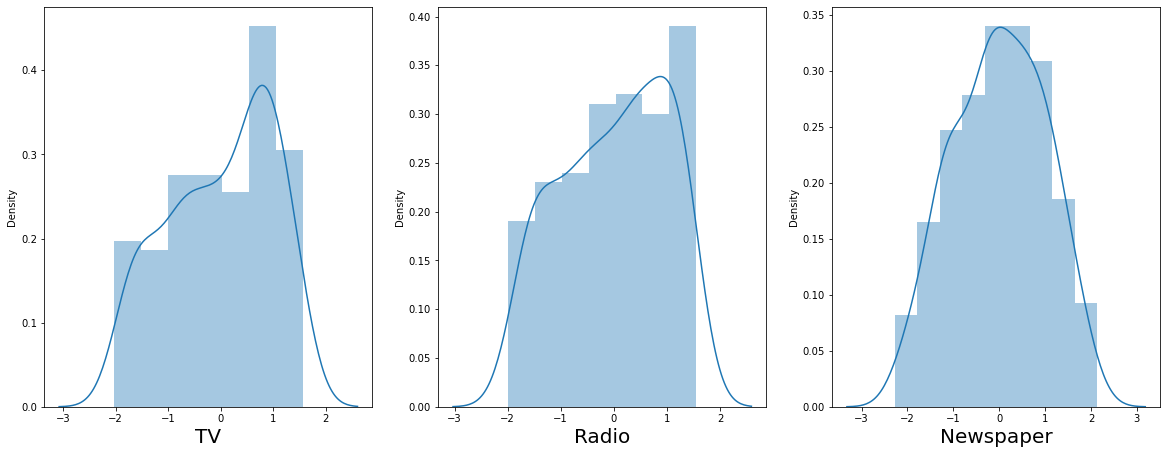

In [28]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [29]:
df_new.skew()

TV          -0.320682
Radio       -0.236668
Newspaper   -0.101288
Sales        0.407130
dtype: float64

Skewness is removed


# Model Preparation

In [30]:
x = df_new.drop("Sales",axis=1)
y = df_new["Sales"]

In [31]:
x

,TV,Radio,Newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
195,-1.288311,-1.423941,-0.687435
196,-0.521579,-1.287689,-1.146090
197,0.416577,-0.862474,-1.314437
198,1.467535,1.182269,1.517395


In [32]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

# Standard scaler¶


In [33]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [34]:
x

,TV,Radio,Newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [35]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Creating train test split 

In [36]:
from sklearn.tree import DecisionTreeRegressor
maxAccuracy=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    modDTR = DecisionTreeRegressor()
    
    # Training the model
    modDTR.fit(x_train, y_train)
    
    # Predcting the value
    pred = modDTR.predict(x_test)
    
    # r2 score
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRS=i
print("Best accuracy is ",maxAccuracy," on Random_state ",maxRS)

Best accuracy is  0.9782547432079395  on Random_state  38


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.naive_bayes import GaussianNB as NB

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Random Forest Regressor

In [39]:
ModRFR=RandomForestRegressor()
ModRFR.fit(x_train,y_train)
pred=ModRFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9827690161813998


# Linear Regression

In [40]:
modlr=LinearRegression()
modlr.fit(x_train,y_train)
pred=modlr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.8915306633872733


# K-Neighbors Regressor

In [41]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9501910158662997


# Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9623841579928336


# Lasso and Ridge Regression

In [43]:
#importing necessary library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [44]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modls=Lasso()
df_new=GridSearchCV(modls,parameters)
df_new.fit(x_train,y_train)
print(df_new.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [45]:
modls=Lasso(alpha=0.1,random_state=0)
modls.fit(x_train,y_train)
modls.score(x_train,y_train)
pred_ls=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))

R2_Score: 0.8915142811028777


In [46]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modlr=Ridge()
df_new=GridSearchCV(modlr,parameters)
df_new.fit(x_train,y_train)
print(df_new.best_params_)

{'alpha': 1, 'random_state': 0}


In [47]:
modlr=Ridge(alpha=1,random_state=0)
modlr.fit(x_train,y_train)
modlr.score(x_train,y_train)
pred_lr=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))

R2_Score: 0.8915142811028777


# Support Vector Machine Regressor

In [48]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9623841579928336


# Cross Validation Score

In [49]:
from sklearn.model_selection import cross_val_score


In [50]:
print("Linear Regression:",cross_val_score(modlr,x,y,cv=5).mean())
print("Random Forest Regressor:",cross_val_score(ModRFR,x,y,cv=5).mean())
print("K-Neighbors Regressor:",cross_val_score(knn,x,y,cv=5).mean())
print("Decision Tree Regressor:",cross_val_score(DTR,x,y,cv=5).mean())
print("Lasso Regression:",cross_val_score(modls,x,y,cv=5).mean())
print("Ridge Regression:",cross_val_score(modlr,x,y,cv=5).mean())
print("Support Vector Machine:",cross_val_score(svr,x,y,cv=5).mean())

Linear Regression: 0.895919188029818
Random Forest Regressor: 0.9765864808572724
K-Neighbors Regressor: 0.943486345366393
Decision Tree Regressor: 0.9567048794611355
Lasso Regression: 0.8957805874289184
Ridge Regression: 0.895919188029818
Support Vector Machine: 0.9202978192122426


Random Forest Regressor model giving 97.6% accuracy. So we go for Random Forest Regressor for Hyper parameter tuning.

# Hyper parameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV
parameter = {'criterion':["mse","mae","poisson"], 'random_state':[1,10,100,1000], 'max_depth':[4,5,7,8,9], 'max_features':["auto","sqrt","log2"] }

In [52]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [53]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [4, 5, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 10, 100, 1000]})

In [54]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 100}

In [55]:
Final_mod=RandomForestRegressor(criterion='mse',max_depth=8,max_features='auto',random_state=100)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

98.48576667454788


# Model Saving
RandomForestRegressor  is giving best results compare to others so we will create model using RandomForestRegressor. 


In [56]:
import pickle
filename='AdvertisingSalesPredict.pkl'
pickle.dump(Final_mod,open(filename,'wb'))

     Actual    Predict
126     6.6   6.548000
139    20.7  21.219000
59     18.4  18.236948
85     15.2  15.301533
197    12.8  13.006853
42     20.7  20.249600
170     8.4   9.792731
122    11.6  11.332857
176    20.2  20.101405
174    11.5  11.978917
191     9.9  10.009675
115    12.6  13.517819
50     11.4  11.693017
154    15.6  15.200910
159    12.9  13.403409
138     9.6  10.245742
175    27.0  25.381000
11     17.4  16.942776
119     6.6   7.077483
186    10.3  10.428513
178    11.8  11.833667
60      8.1   8.880292
72      8.8   9.001700
17     24.4  23.478000
40     16.6  16.284210
179    12.6  12.923272
162    14.9  14.957267
167    12.2  11.900250
91      7.3   7.441733
171    14.5  14.567768
147    25.4  24.226310
41     17.1  18.219100
151    11.6  11.755765
73     11.0  11.227265
114    14.6  13.653876
7      13.2  13.323359
92     19.4  19.369933
6      11.8  11.192902
47     23.2  22.783146
161    13.3  13.571534
105    19.2  17.953000
23     15.5  15.546991
48     14.8

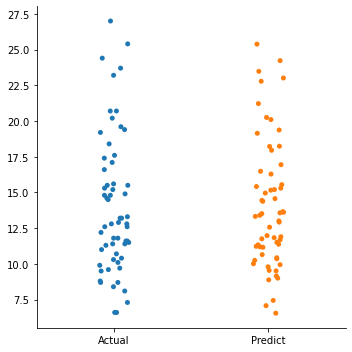

In [57]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=Final_mod.predict(x_test)

print(res)
sns.catplot(data=res)

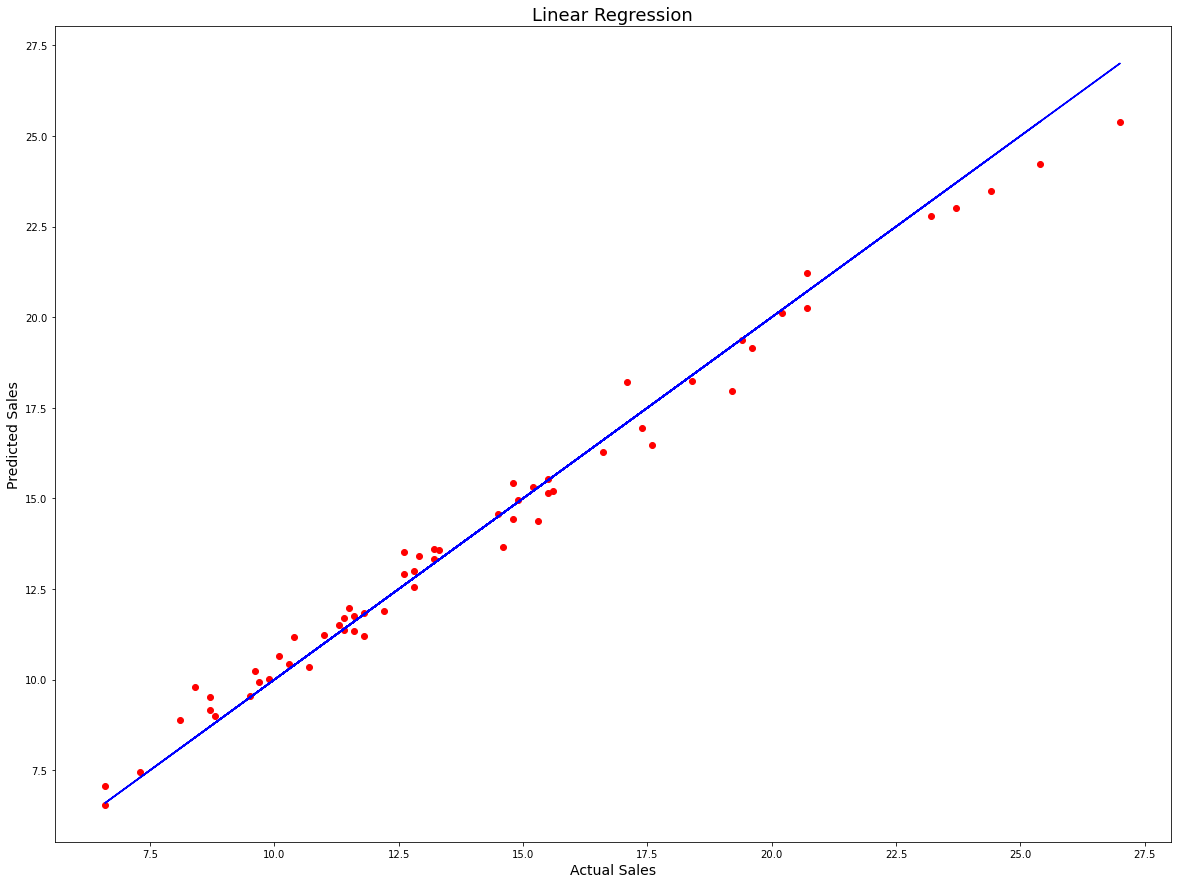

In [58]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = res['Predict'], color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Sales', fontsize = 14)
plt.ylabel('Predicted Sales', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()